In [1]:
# Import all necessaries libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.optimize import brentq
import openpyxl
from scipy import interpolate
from scipy.interpolate import interp1d
import os


# Date Pre-Processing
## Earnings

/var/folders/hd/rjkgpqd15sb8fjpp7d76twq80000gn/T/ipykernel_3829/1079694294.py:13: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  time_indices = pd.date_range(start='2021-01-01', periods=len(earnings_data["Oslo"]), freq='Q')
/var/folders/hd/rjkgpqd15sb8fjpp7d76twq80000gn/T/ipykernel_3829/1079694294.py:17: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  future_indices = pd.date_range(start=earnings_df.index[-1] + pd.DateOffset(months=3), periods=8, freq='Q')  # From 2024Q3 to 2026Q2


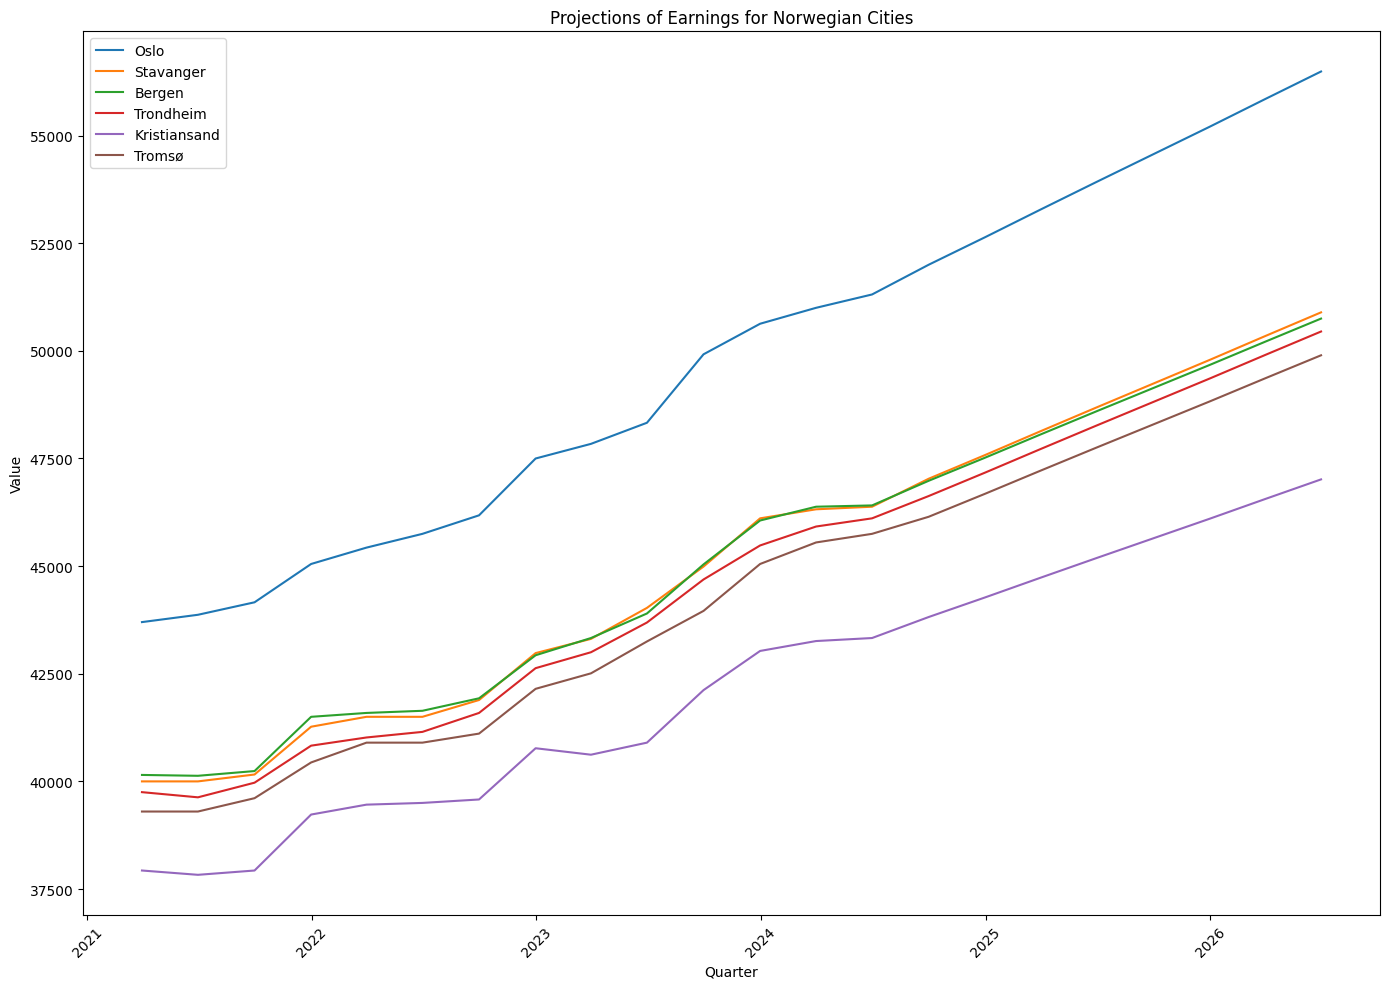

In [ ]:
# Code is developed with assistance of AI tools (ChatGPT and Github Copilot)
# Earnings
# Historical quarterly data for each city
earnings_data = {
    "Oslo": [43700, 43870, 44160, 45050, 45430, 45750, 46180, 47500, 47840, 48330, 49920, 50630, 51000, 51310],
    "Stavanger": [40000, 40000, 40160, 41270, 41500, 41500, 41890, 42980, 43310, 44030, 44990, 46110, 46320, 46380],
    "Bergen": [40150, 40130, 40240, 41500, 41590, 41640, 41930, 42930, 43330, 43900, 45040, 46060, 46380, 46410],
    "Trondheim": [39750, 39630, 39970, 40830, 41020, 41150, 41590, 42630, 43000, 43690, 44690, 45480, 45920, 46110],
    "Kristiansand": [37930, 37830, 37930, 39230, 39460, 39500, 39580, 40770, 40620, 40900, 42120, 43030, 43260, 43330],
    "Tromsø": [39300, 39300, 39610, 40440, 40900, 40900, 41110, 42150, 42510, 43250, 43960, 45050, 45550, 45750]
}

# Create time indices for historical quarters
time_indices = pd.date_range(start='2021-01-01', periods=len(earnings_data["Oslo"]), freq='Q')
earnings_df = pd.DataFrame(earnings_data, index=time_indices)

# Generate future time indices for projections until 2026Q2
future_indices = pd.date_range(start=earnings_df.index[-1] + pd.DateOffset(months=3), periods=8, freq='Q')  # From 2024Q3 to 2026Q2

# Function to create projections using Linear Regression
def project_city_data_linear_regression(df, city, future_indices):
    X = np.arange(len(df)).reshape(-1, 1)  # Historical time indices as feature
    y = df[city].values  # Historical values for the city

    # Train linear regression model
    model = LinearRegression()
    model.fit(X, y)

    # Predict future values
    future_X = np.arange(len(df), len(df) + len(future_indices)).reshape(-1, 1)
    future_predictions = model.predict(future_X)

    return future_predictions

# Create an empty DataFrame to hold future projections for all cities
earnings_projections_df = pd.DataFrame(index=future_indices)

# Generate projections for each city and add them to projections_df
for city in earnings_df.columns:
    city_projections = project_city_data_linear_regression(earnings_df, city, future_indices)
    earnings_projections_df[city] = city_projections

# Concatenate the original DataFrame with the projections DataFrame
earnings_df = pd.concat([earnings_df, earnings_projections_df])

# Plot the historical and projected data
def plot_city_projections(df, object=' '):
    plt.figure(figsize=(14, 10))
    for city in df.columns:
        plt.plot(df.index, df[city], label=city)

    plt.xlabel("Quarter")
    plt.ylabel("Value")
    plt.title(f"Projections of {object} for Norwegian Cities")
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

#plot the results
plot_city_projections(earnings_df, "Earnings")


## Job Prospects

/var/folders/hd/rjkgpqd15sb8fjpp7d76twq80000gn/T/ipykernel_3829/4026672219.py:12: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  time_indices = pd.date_range(start='2021-01-01', periods=len(job_data["Oslo"]), freq='Q')
/var/folders/hd/rjkgpqd15sb8fjpp7d76twq80000gn/T/ipykernel_3829/4026672219.py:16: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  future_indices = pd.date_range(start=job_df.index[-1] + pd.DateOffset(months=3), periods=8, freq='Q')  # From 2024Q3 to 2026Q2


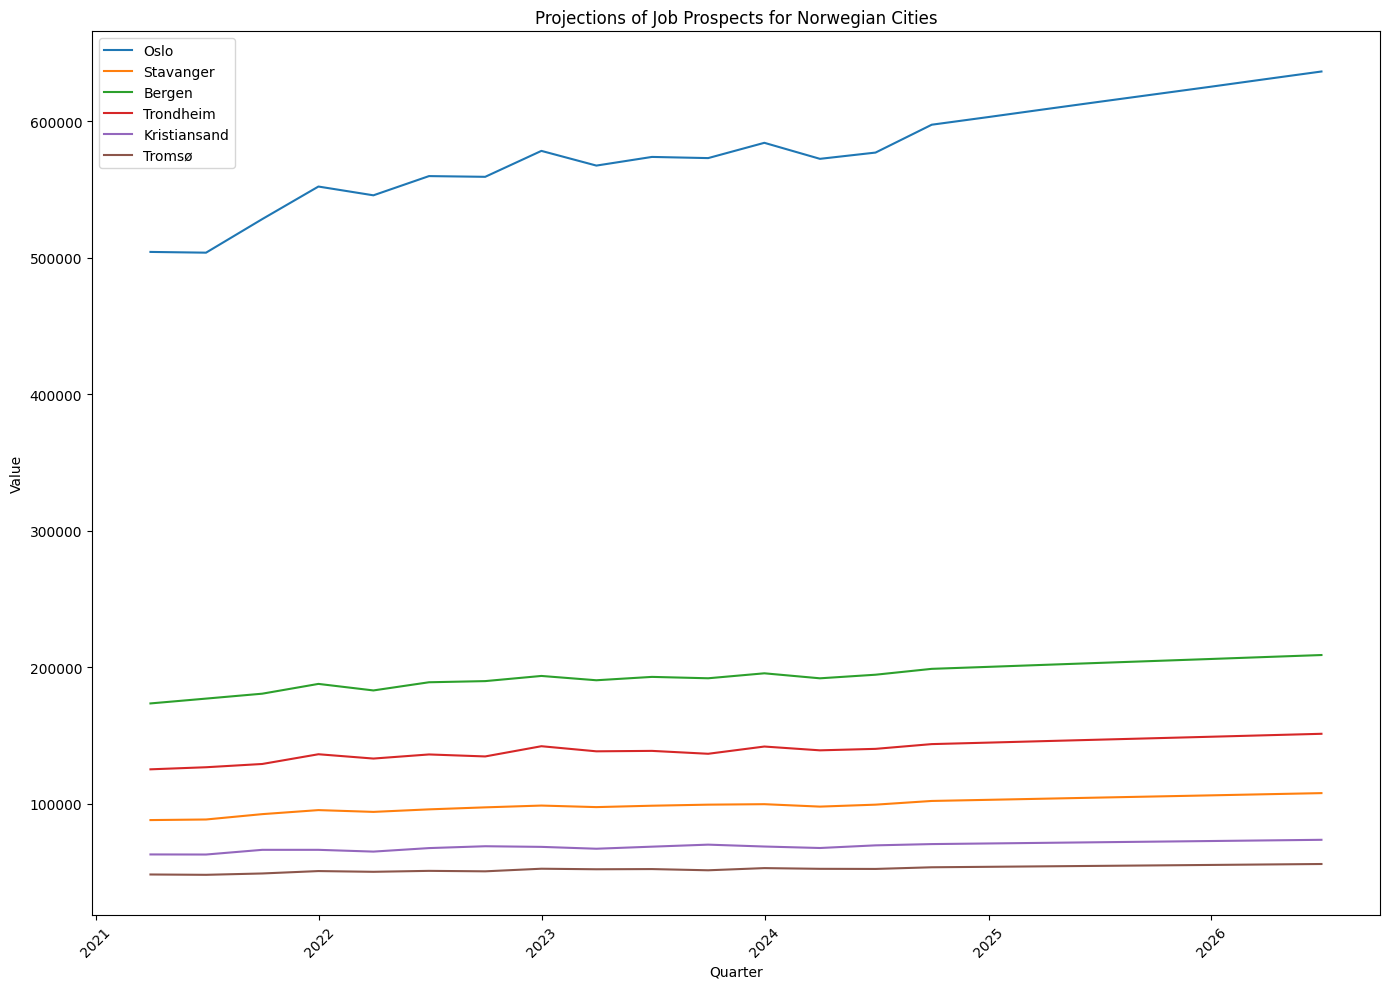

In [ ]:
# Code is developed with assistance of AI tools (ChatGPT and Github Copilot)
# Job Prospects projection to 2026Q2 using Linear Regression
# Historical quarterly data for each city
job_data = {
    "Oslo": [504199, 503658, 528240, 552090, 545664, 559740, 559218, 578209, 567443, 573783, 572926, 584122, 572385, 576973],
    "Stavanger": [88043, 88471, 92391, 95349, 94038, 95892, 97363, 98673, 97543, 98565, 99338, 99683, 97907, 99337],
    "Bergen": [173489, 177019, 180621, 187789, 183001, 188990, 189832, 193616, 190460, 192920, 191909, 195549, 191884, 194515],
    "Trondheim": [125220, 126741, 129134, 136262, 133104, 136111, 134656, 142140, 138407, 138726, 136605, 141911, 139126, 140210],
    "Kristiansand": [62873, 62807, 66246, 66252, 64954, 67524, 68879, 68415, 67053, 68568, 70050, 68671, 67589, 69528],
    "Tromsø": [48191, 47945, 48932, 50691, 50154, 50845, 50503, 52412, 52013, 52152, 51268, 52858, 52340, 52254]
}
# Create time indices for historical quarters
time_indices = pd.date_range(start='2021-01-01', periods=len(job_data["Oslo"]), freq='Q')
job_df = pd.DataFrame(job_data, index=time_indices)

# Generate future time indices for projections until 2026Q2
future_indices = pd.date_range(start=job_df.index[-1] + pd.DateOffset(months=3), periods=8, freq='Q')  # From 2024Q3 to 2026Q2

# Create an empty DataFrame to hold future projections for all cities
job_projections_df = pd.DataFrame(index=future_indices)

# Generate projections for each city and add them to projections_df
for city in job_df.columns:
    job_projections = project_city_data_linear_regression(job_df, city, future_indices)
    job_projections_df[city] = job_projections

# Concatenate the original DataFrame with the projections DataFrame
job_df = pd.concat([job_df, job_projections_df])

# Plot the results
plot_city_projections(job_df, "Job Prospects")

## Rent Prices

/var/folders/hd/rjkgpqd15sb8fjpp7d76twq80000gn/T/ipykernel_3829/125805844.py:13: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  time_indices = pd.date_range(start='2019-01-01', periods=len(rent_data["Oslo"]), freq='Y')
/var/folders/hd/rjkgpqd15sb8fjpp7d76twq80000gn/T/ipykernel_3829/125805844.py:17: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  future_indices = pd.date_range(start=rent_df.index[-1] + pd.DateOffset(years=1), periods=2, freq='Y')  # From 2025 to 2026


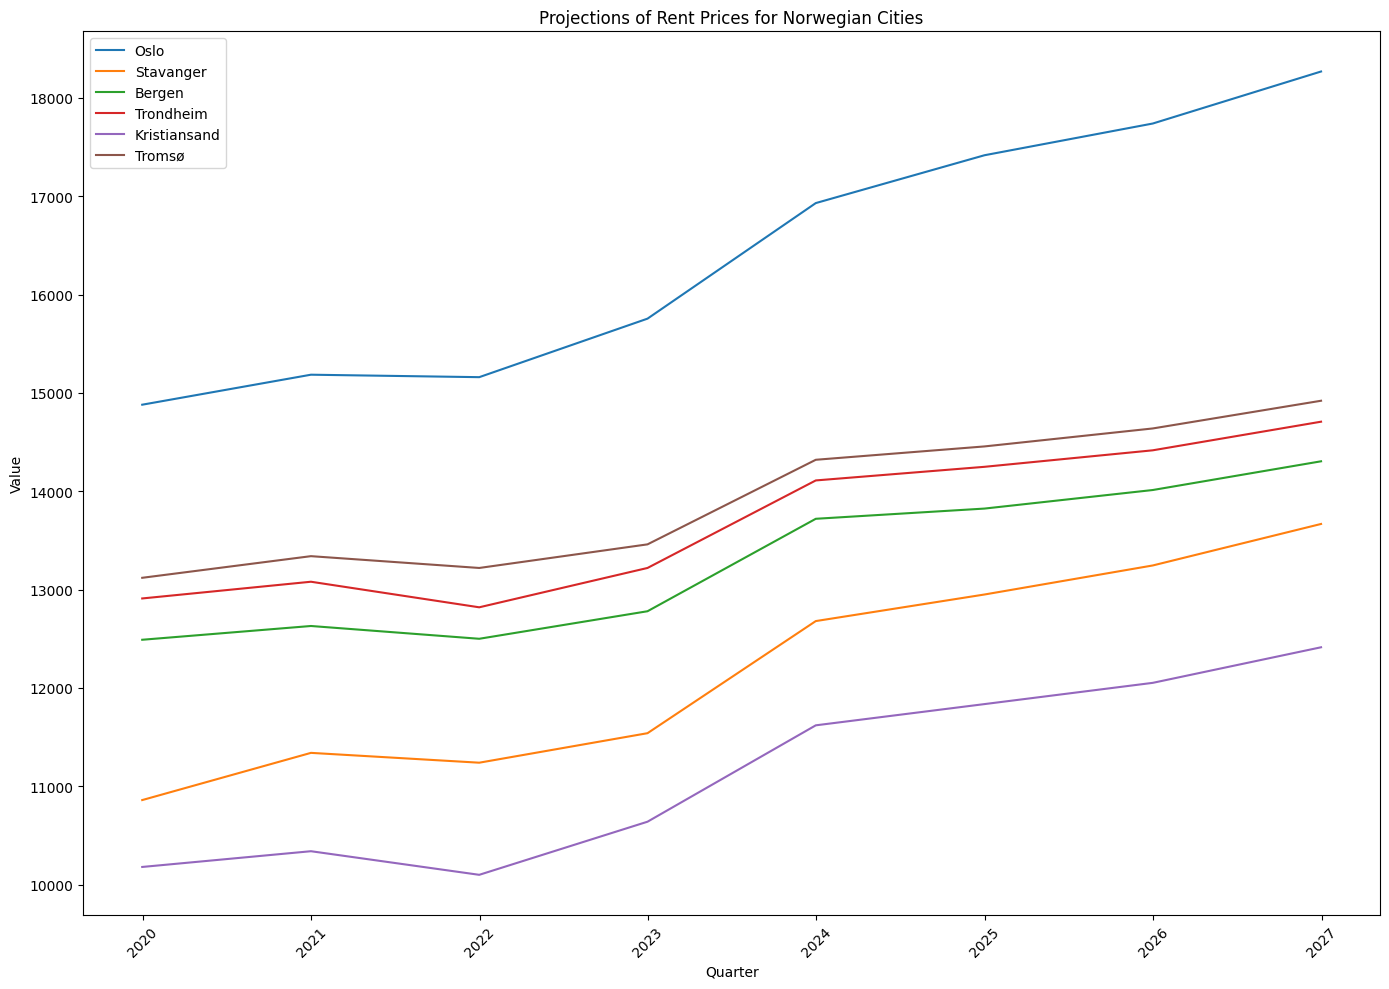

In [ ]:
# Code is developed with assistance of AI tools (ChatGPT and Github Copilot)
# Rent Prices projection to 2026 using Linear Regression
# Historical yearly data for each city
rent_data = {
    "Oslo": [14880, 15185, 15160, 15755, 16930, 17416.5],
    "Stavanger": [10860, 11340, 11240, 11540, 12680, 12950.2],
    "Bergen": [12490, 12630, 12500, 12780, 13720, 13823.9],
    "Trondheim": [12910, 13080, 12820, 13220, 14110, 14248.5],
    "Kristiansand": [10180, 10340, 10100, 10640, 11620, 11835.9],
    "Tromsø": [13120, 13340, 13220, 13460, 14320, 14455.8]
}

# Create time indices for historical years
time_indices = pd.date_range(start='2019-01-01', periods=len(rent_data["Oslo"]), freq='Y')
rent_df = pd.DataFrame(rent_data, index=time_indices)

# Generate future time indices for projections until 2026
future_indices = pd.date_range(start=rent_df.index[-1] + pd.DateOffset(years=1), periods=2, freq='Y')  # From 2025 to 2026


# Create an empty DataFrame to hold future projections for all cities
rent_projections_df = pd.DataFrame(index=future_indices)

# Generate projections for each city and add them to projections_df
for city in rent_df.columns:
    rent_projections = project_city_data_linear_regression(rent_df, city, future_indices)
    rent_projections_df[city] = rent_projections

# Concatenate the original DataFrame with the projections DataFrame
rent_df = pd.concat([rent_df, rent_projections_df])

# Plot the results
plot_city_projections(rent_df, "Rent Prices")

## Crime Rates

In [ ]:
# Code is developed with assistance of AI tools (ChatGPT and Github Copilot)
# Function to load and clean data from Excel
def load_crime_data(file_path, year_row=2, data_start_row=3):
    # Load the Excel file
    df = pd.read_excel(file_path)

    # Extract years from the specified row and convert to integers
    years = pd.to_numeric(df.iloc[year_row, 2:13], errors='coerce').dropna().astype(int).values

    # Initialize a list to hold extracted data
    extracted_data = []
    
    # Extract the crime data from subsequent rows
    for i in range(8):  # Assuming there are 8 rows of crime data
        row_data = df.iloc[data_start_row + i, 2:len(years) + 2].values  # Adjust column range
        # Convert to numeric, coercing errors to NaN
        cleaned_row = pd.to_numeric(row_data, errors='coerce')
        extracted_data.append(cleaned_row)

    # Create a DataFrame from the extracted data
    extracted_df = pd.DataFrame(extracted_data, columns=years)
    
    return extracted_df

# Function to extrapolate crime data for each metric
def extrapolate_crime_data(df, new_years):
    # Define a list to hold extrapolated results for each row
    extrapolated_results = []
    
    # Iterate through each row (each crime metric)
    for idx, row in df.iterrows():
        # Create an interpolation function that can also extrapolate
        x = row.index.values  # Existing years
        y = row.values  # Corresponding values
        
        # Check if we have enough data to extrapolate
        if len(x) > 1 and np.any(~np.isnan(y)):  # Ensure there's enough data
            f = interp1d(x, y, fill_value='extrapolate', kind='linear')  # Linear extrapolation
            extrapolated_row = f(new_years)  # Extrapolate new years
            extrapolated_results.append(pd.Series(extrapolated_row, index=new_years))
        else:
            # If not enough data, fill with NaN
            extrapolated_results.append(pd.Series([np.nan] * len(new_years), index=new_years))
    
    # Combine the original DataFrame with the extrapolated results
    extrapolated_df = pd.concat([df, pd.DataFrame(extrapolated_results, index=df.index)], axis=1)
    
    return extrapolated_df

# Example of loading data for each city
stav_crime = pd.read_excel('./Crime/stav_crime.xlsx')
oslo_crime = pd.read_excel('./Crime/oslo_crime.xlsx')
tromso_crime = pd.read_excel('./Crime/tromso_crime.xlsx')
tron_crime = pd.read_excel('./Crime/trondheim_crime.xlsx')
ber_crime = pd.read_excel('./Crime/bergen_crime.xlsx')
kris_crime = pd.read_excel('./Crime/kristiansand_crime.xlsx')

# Example of loading data for each city
stav_crime = load_crime_data('./Crime/stav_crime.xlsx')
oslo_crime = load_crime_data('./Crime/oslo_crime.xlsx')
tromso_crime = load_crime_data('./Crime/tromso_crime.xlsx')
tron_crime = load_crime_data('./Crime/trondheim_crime.xlsx')
ber_crime = load_crime_data('./Crime/bergen_crime.xlsx')
kris_crime = load_crime_data('./Crime/kristiansand_crime.xlsx')

# Define the new years we want to predict
new_years = [2024, 2025, 2026]

# Apply the extrapolation function to each city's data
stav_crime_final = extrapolate_crime_data(stav_crime, new_years)
oslo_crime_final = extrapolate_crime_data(oslo_crime, new_years)
tromso_crime_final = extrapolate_crime_data(tromso_crime, new_years)
tron_crime_final = extrapolate_crime_data(tron_crime, new_years)
ber_crime_final = extrapolate_crime_data(ber_crime, new_years)
kris_crime_final = extrapolate_crime_data(kris_crime, new_years)

# Display the final extrapolated DataFrames for each city
print("Extrapolated Stavanger Crime Data:\n", stav_crime_final)
print("\nExtrapolated Oslo Crime Data:\n", oslo_crime_final)
print("\nExtrapolated Tromsø Crime Data:\n", tromso_crime_final)
print("\nExtrapolated Trondheim Crime Data:\n", tron_crime_final)
print("\nExtrapolated Bergen Crime Data:\n", ber_crime_final)
print("\nExtrapolated Kristiansand Crime Data:\n", kris_crime_final)


Extrapolated Stavanger Crime Data:
     2014   2015  2016  2017  2018  2019  2020  2021  2022   2023     2024  \
0  11575  10099  9504  8235  7667  7945  7711  7052  8521  10198  11875.0   
1   2044   2417  2544  2296  2258  2488  2129  1891  1757   1760   1763.0   
2   1410   1374  1580  1595  1788  1876  1850  1746  2017   2193   2369.0   
3   2724   2873  2931  2987  3223  3210  3018  2956  3189   3583   3977.0   
4    357    423   540   581   644   571   567   661   607    535    463.0   
5   5894   5431  5001  4790  5036  3683  3475  2504  2526   2593   2660.0   
6   3532   3441  3102  2647  3108  2687  2390  2269  2572   2467   2362.0   
7   3796   3732  3348  3237  3094  3043  3042  2935  2937   2904   2871.0   

      2025     2026  
0  13552.0  15229.0  
1   1766.0   1769.0  
2   2545.0   2721.0  
3   4371.0   4765.0  
4    391.0    319.0  
5   2727.0   2794.0  
6   2257.0   2152.0  
7   2838.0   2805.0  

Extrapolated Oslo Crime Data:
     2014   2015   2016   2017   2018   2

## Air Quality

In [ ]:
# Code is developed with assistance of AI tools (ChatGPT and Github Copilot)
def process_air_quality_data(file_path):
    # Load the data
    data = pd.read_csv(file_path, na_values='')  # Replace empty strings with NaN

    # Print column names for debugging
    print(f"Columns in {file_path}: {data.columns.tolist()}")

    # Strip whitespace and convert to lower case for consistency
    data.columns = data.columns.str.strip().str.lower()

    # Convert 'date' column to datetime format if it exists
    if 'date' in data.columns:
        data['date'] = pd.to_datetime(data['date'])

    # Convert numerical columns to appropriate types and print sample data for debugging
    for col in data.columns:
        if col != 'date':  # Skip the date column
            data[col] = pd.to_numeric(data[col], errors='coerce')  # Handle non-numeric gracefully

    # Debugging: Check data types and the first few rows
    print(f"Data types for {file_path}:\n{data.dtypes}")
    print(f"First few rows for {file_path}:\n{data.head()}")

    # Clean the data: drop rows with NaN values in any PM columns
    data = data.dropna(subset=['pm25'])  # Drop rows with NaN in pm25

    # Compute statistics for all columns
    stats = {}
    for col in data.columns:
        if col != 'date':
            mean_value = data[col].mean()
            std_value = data[col].std()
            stats[col] = {
                'mean': mean_value,
                'std': std_value
            }

    return stats, data

# read data
stats, cleaned_data = process_air_quality_data('./Air Quality/norway-air-quality-stavanger.csv')
stats, cleaned_data = process_air_quality_data('./Air Quality/norway-air-quality-bergen.csv')
stats, cleaned_data = process_air_quality_data('./Air Quality/norway-air-quality-oslo.csv')
stats, cleaned_data = process_air_quality_data('./Air Quality/norway-air-quality-trondheim.csv')
stats, cleaned_data = process_air_quality_data('./Air Quality/norway-air-quality-tromso.csv')
stats, cleaned_data = process_air_quality_data('./Air Quality/norway-air-quality-kristiansand.csv')
# Print results
print("\nComputed Statistics:")
for pollutant, values in stats.items():
    print(f"{pollutant.capitalize()}: Mean = {values['mean']:.2f}, Std = {values['std']:.2f}")


Columns in ./Air Quality/norway-air-quality-stavanger.csv: ['date', ' pm25', ' pm10', ' no2']
Data types for ./Air Quality/norway-air-quality-stavanger.csv:
date    datetime64[ns]
pm25           float64
pm10           float64
no2            float64
dtype: object
First few rows for ./Air Quality/norway-air-quality-stavanger.csv:
        date  pm25  pm10  no2
0 2024-10-08  29.0   2.0  5.0
1 2024-10-09   8.0   5.0  2.0
2 2024-10-10  12.0   6.0  2.0
3 2024-10-11  20.0   2.0  8.0
4 2024-10-12   9.0   NaN  2.0
Columns in ./Air Quality/norway-air-quality-bergen.csv: ['date', ' pm25', ' pm10', ' o3', ' no2']
Data types for ./Air Quality/norway-air-quality-bergen.csv:
date    datetime64[ns]
pm25           float64
pm10           float64
o3             float64
no2            float64
dtype: object
First few rows for ./Air Quality/norway-air-quality-bergen.csv:
        date  pm25  pm10  o3  no2
0 2024-10-01  13.0   6.0 NaN  NaN
1 2024-10-02  15.0   6.0 NaN  NaN
2 2024-10-03  15.0  12.0 NaN  NaN
3 2

## Rainfall

In [ ]:
# Code is developed with assistance of AI tools (ChatGPT and Github Copilot)
# Read the CSV file into a DataFrame (adjust the separator if needed)
df = pd.read_csv('./Rainfall/OpadyAll.csv', sep=';')

# Iterate over unique values in the 'Location' column and create separate files
for location in df['Navn'].unique():
    # Filter rows corresponding to the current location
    location_df = df[df['Navn'] == location]
    
    # Replace spaces and special characters in location name for the filename
    safe_location_name = location.replace(' ', '_').replace('-', '_')
    
    # Create a new CSV file for each location
    location_df.to_csv(f'{safe_location_name}.csv', index=False, sep=';')
    
    print(f"Created {safe_location_name}.csv")


# List of CSV files
files = [
    'Bergen___Florida.csv',
    'Kristiansund___Karihola.csv',
    'Oslo___Blindern.csv',
    'Stavanger___Våland.csv',
    'Tromsø.csv',
    'Trondheim___Risvollan.csv'
]

mean_values = {}

for file in files:
    # Read the CSV file with semicolon delimiter
    df = pd.read_csv(file, sep=';')
    
    # Rename the column to simplify access
    df.rename(columns={'Nedbør (døgn), mm': 'Level'}, inplace=True)
    
    # Replace commas with dots and convert to float
    df['Level'] = df['Level'].str.replace(',', '.').astype(float)

    # Calculate the mean of the 'Level' column
    mean1 = df['Level'].mean()

    mean_values[file] = mean1

    # Delete the file after processing
    os.remove(file)

# Extract mean values as a NumPy array or a list
mean_array = np.array(list(mean_values.values()))

# Print the results
print("Mean values as NumPy array:", mean_array)


Created Bergen___Florida.csv
Created Kristiansund___Karihola.csv
Created Oslo___Blindern.csv
Created Stavanger___Våland.csv
Created Tromsø.csv
Created Trondheim___Risvollan.csv
Created Data_er_gyldig_per_12.10.2024_(CC_BY_4.0),_Meteorologisk_institutt_(MET).csv
Mean values as NumPy array: [6.3253406  2.71321839 2.83651226 4.09722992 2.45122616 1.99056604]


# Assessing and Deciding
## Monte Carlo Simulation

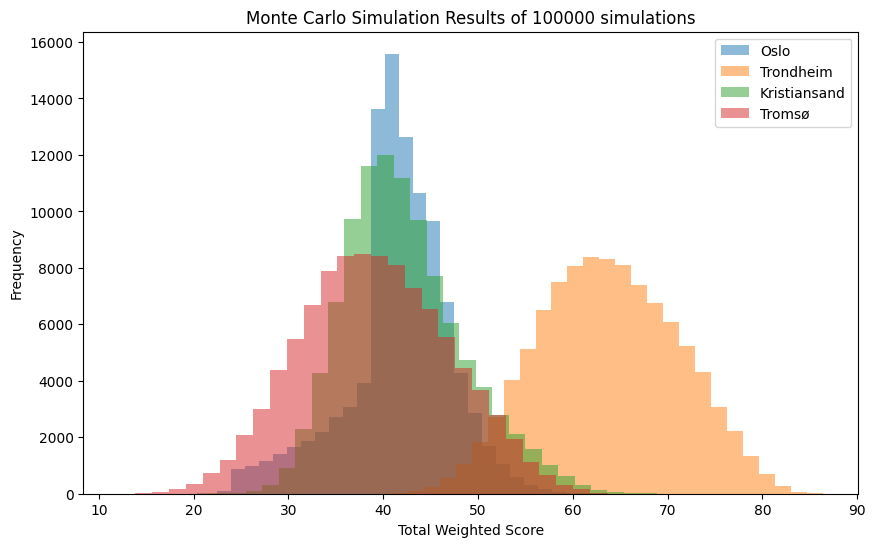

                Oslo      Trondheim   Kristiansand         Tromsø
count  100000.000000  100000.000000  100000.000000  100000.000000
mean       41.535914      63.741920      42.155401      39.160881
std         5.542060       7.373107       6.278798       7.823927
min        22.493961      35.847433      18.587082      12.079885
25%        39.400721      58.398897      37.730544      33.597371
50%        41.714956      63.572500      41.387071      38.944789
75%        44.954012      69.104684      45.886769      44.629441
max        66.634991      86.400427      70.580606      65.351316


In [ ]:
# Code is developed with assistance of AI tools (ChatGPT and Github Copilot)
# Define the data from the table
objectives = ['Job Prospect', 'PhD Opportunities', 'Earnings', 'Rent Prices', 'Transportation Cost', 'Food Cost', 'Outdoor Activity', 'Weather', 'PM2.5', 'NO2', 'Crime Rate']
weights = {'Job Prospect': 95, 'PhD Opportunities': 66, 'Earnings': 100, 'Rent Prices': 85, 'Transportation Cost': 20, 'Food Cost': 39, 'Outdoor Activity': 50, 'Weather': 65, 'PM2.5': 38, 'NO2': 40, 'Crime Rate': 60}

# Real values for alternatives (excluding Stavanger and Bergen)
alternatives_real_values = {
    'Oslo': [636357, 89, 56489, 18267.93, 897, 5215.59, 396, 2.8, 32.07, 13.78, 18042],
    'Trondheim': [151243, 886, 50450, 14707, 899, 4824.18, 293, 2.0, 24.08, 11.08, 6589],
    'Kristiansand': [73593, 65, 47015, 12414, 902, 4763.17, 159, 2.7, 28.48, 3.98, 6216],
    'Tromsø': [55867, 49, 49897, 14920, 580, 4712.56, 169, 2.5, 26.37, 11.8, 5768]
}

# Normalize weights
total_weight = sum(weights.values())
normalized_weights = {obj: w / total_weight for obj, w in weights.items()}

# Linear normalization of real values to a scale of 0-100
def normalize(values):
    min_val = min(values)
    max_val = max(values)
    return [(val - min_val) / (max_val - min_val) * 100 if max_val != min_val else 0 for val in values]

# Linear normalization of values with decrease linearity (max score = 0, min score = 100)
def normalize_decreasing(values):
    min_val = min(values)
    max_val = max(values)
    return [(max_val - val) / (max_val - min_val) * 100 if max_val != min_val else 0 for val in values]

# Logarithmic normalization of real values to a scale of 0-100
def normalize_logarithmic(values):
    min_val = min(values)
    max_val = max(values)
    return [(np.log(val) - np.log(min_val)) / (np.log(max_val) - np.log(min_val)) * 100 if max_val != min_val and val > 0 else 0 for val in values]

# Normalization of the real values, using logarithmic function for Job Prospect and PhD Opportunities and linear function for the rest
normalized_real_values = {}
for obj, values in zip(objectives, zip(*alternatives_real_values.values())):
    if obj in ['Job Prospect', 'PhD Opportunities']:
        normalized_values = normalize_logarithmic(values)
    elif obj in ['Earnings', 'Outdoor Activity']:
        normalized_values = normalize(values)
    else:
        normalized_values = normalize_decreasing(values)
    for alt, val in zip(alternatives_real_values.keys(), normalized_values):
        if alt not in normalized_real_values:
            normalized_real_values[alt] = []
        normalized_real_values[alt].append(val)

# Number of Monte Carlo simulations
n_simulations = 100000

# Store results for each alternative
results = {alt: [] for alt in alternatives_real_values}
varied_values_store = {alt: {obj: [] for obj in objectives} for alt in alternatives_real_values}

# Monte Carlo Simulation
np.random.seed(1234)  # For reproducibility
for _ in range(n_simulations):
    # Randomly vary real values using normal distribution with 95% of the values within 2 std deviations
    varied_real_values = {
        alt: [
            max(0, np.random.normal(val, val * 0.1)) for val in values
        ]
        for alt, values in alternatives_real_values.items()
    }
    
    # Normalize the varied values based on the function (Max, Min, or Logarithmic)
    normalized_varied_values = {}
    for obj, values in zip(objectives, zip(*[varied_real_values[alt] for alt in alternatives_real_values.keys()])):
        if obj in ['Job Prospect', 'PhD Opportunities']:
            normalized_values = normalize_logarithmic(values)
        elif obj in ['Earnings', 'Outdoor Activity']:
            normalized_values = normalize(values)
        else:
            normalized_values = normalize_decreasing(values)
        for alt, val in zip(alternatives_real_values.keys(), normalized_values):
            if alt not in normalized_varied_values:
                normalized_varied_values[alt] = []
            normalized_varied_values[alt].append(val)
            varied_values_store[alt][obj].append(val)
    
    # Calculate the total weighted score for each alternative
    for alt in alternatives_real_values.keys():
        total_value = sum(normalized_varied_values[alt][i] * normalized_weights[obj] for i, obj in enumerate(objectives))
        results[alt].append(total_value)

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Plot the distribution of scores for each alternative
plt.figure(figsize=(10, 6))
for alt in results_df.columns:
    plt.hist(results_df[alt], bins=30, alpha=0.5, label=alt)

plt.xlabel('Total Weighted Score')
plt.ylabel('Frequency')
plt.title(f'Monte Carlo Simulation Results of {n_simulations} simulations')
plt.legend()
plt.show()


# Summary statistics
summary_stats = results_df.describe()
print(summary_stats)


## One Way Sensitivity Analysis

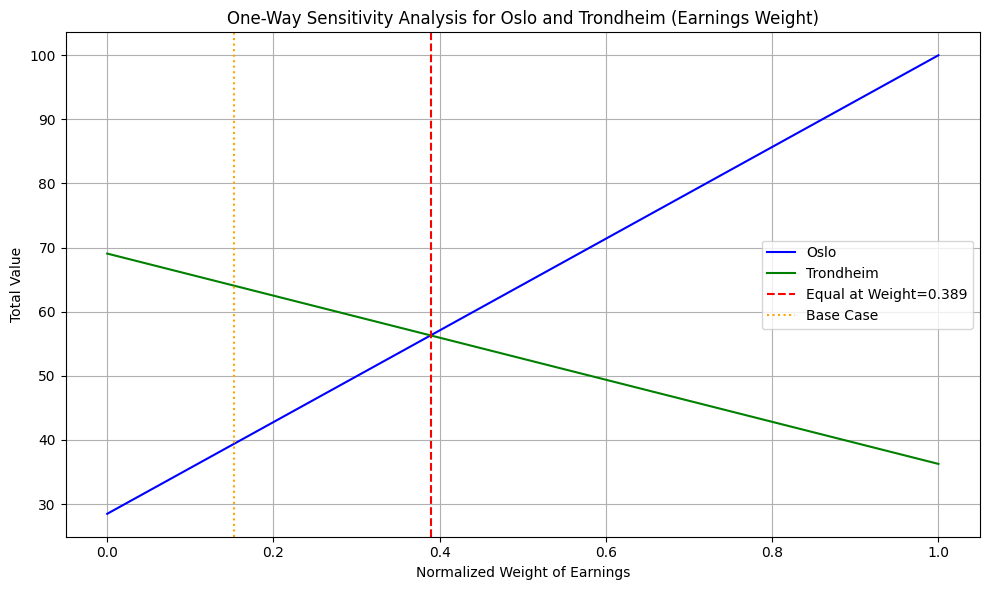

In [ ]:
# Code is developed with assistance of AI tools (ChatGPT and Github Copilot)
# One-Way Sensitivity Analysis for Oslo and Trondheim (Earnings Weight)
data = {
    "Objectives": ["Job Prospect", "PhD opportunities", "Earnings", "Rent Prices", "Transportation Cost",
                   "Food Cost", "Outdoor Activity", "Weather", "PM2.5", "NO2", "Crime Rate"],
    "Rank": [2, 4, 1, 3, 11, 9, 7, 5, 10, 8, 6],
    "Weight": [95, 66, 100, 85, 20, 39, 50, 65, 38, 40, 60],
    "Normalized Weight": [0.1444, 0.1003, 0.1520, 0.1292, 0.0304, 0.0593, 0.0760, 0.0988, 0.0578, 0.0608, 0.0912],
    "Oslo": [100.00, 20.62, 100.00, 0.00, 1.55, 0.00, 100.00, 0.00, 0.00, 0.00, 0.00],
    "Trondheim": [40.94, 100.00, 36.26, 60.82, 0.93, 77.81, 56.54, 100.00, 100.00, 27.55, 93.31],
}

# Create a DataFrame from the data
df = pd.DataFrame(data)

# Define the range of values for the normalized weight of "Earnings"
earnings_weight = np.linspace(0, 1, 100)

# Perform the one-way sensitivity analysis using Custom Scaling Based on Base Case approach (redistribute proportionally based on the base case)
sensitivity_analysis = {"Earnings Weight": earnings_weight, "Oslo": [], "Trondheim": []}

# Define the base proportion by calculating each weight share from the base case (excluding "Earnings")
base_weights = df.loc[df["Objectives"] != "Earnings", "Normalized Weight"].values
proportion = base_weights / base_weights.sum()

# Assign new weight for earnings and redistribute the rest proportionally 
for new_weight in earnings_weight:
    # Set the weight of "Earnings"
    df.loc[df["Objectives"] == "Earnings", "Normalized Weight"] = new_weight

    # Calculate the remaining weight and distribute it proportionally among the other objectives
    remaining_weight = 1 - new_weight
    adjusted_weights = remaining_weight * proportion

    # Update the DataFrame with adjusted weights
    df.loc[df["Objectives"] != "Earnings", "Normalized Weight"] = adjusted_weights

    # Recalculate the total value for Oslo and Trondheim
    df["Weighted Value Oslo"] = df["Normalized Weight"] * df["Oslo"]
    df["Weighted Value Trondheim"] = df["Normalized Weight"] * df["Trondheim"]

    total_value_oslo = df["Weighted Value Oslo"].sum()
    total_value_trondheim = df["Weighted Value Trondheim"].sum()

    # Appending the results
    sensitivity_analysis["Oslo"].append(total_value_oslo)
    sensitivity_analysis["Trondheim"].append(total_value_trondheim)

# Convert sensitivity results to a DataFrame
df_sensitivity = pd.DataFrame(sensitivity_analysis)

# Function to find the weight where Oslo equals Trondheim
def find_equal_weight(weight):
    oslo_value = np.interp(weight, df_sensitivity["Earnings Weight"], df_sensitivity["Oslo"])
    trondheim_value = np.interp(weight, df_sensitivity["Earnings Weight"], df_sensitivity["Trondheim"])
    return oslo_value - trondheim_value

# Find the weight where Oslo equals Trondheim
equal_weight = brentq(find_equal_weight, 0, 1)

# take the base case value for plotting
# Locate the index of "Earnings" in the "Objectives" list
index_of_earnings = data["Objectives"].index("Earnings")

# Access the corresponding value in the "Normalized Weight" list
base_case_normalized_weight_earnings = data["Normalized Weight"][index_of_earnings]

# Plot the sensitivity analysis results with custom scaling based on the base case
plt.figure(figsize=(10, 6))
plt.plot(df_sensitivity["Earnings Weight"], df_sensitivity["Oslo"], label="Oslo", color='b')
plt.plot(df_sensitivity["Earnings Weight"], df_sensitivity["Trondheim"], label="Trondheim", color='g')
plt.axvline(equal_weight, color='r', linestyle='--', label=f'Equal at Weight={equal_weight:.3f}')
plt.axvline(base_case_normalized_weight_earnings, color='orange', linestyle=':', label='Base Case')
plt.xlabel("Normalized Weight of Earnings")
plt.ylabel("Total Value")
plt.title("One-Way Sensitivity Analysis for Oslo and Trondheim (Earnings Weight)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Decision Quality Assessment
## DQ Chain Plot

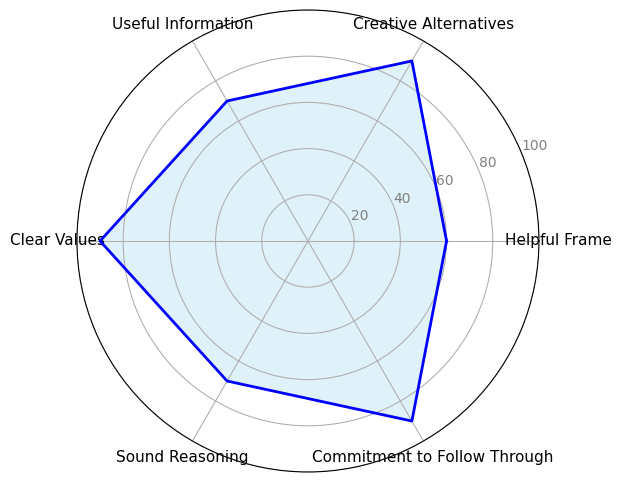

In [ ]:
# Code is developed with assistance of AI tools (ChatGPT and Github Copilot)
# Categories and example scores
labels = [
    "Helpful Frame",
    "Creative Alternatives",
    "Useful Information",
    "Clear Values",
    "Sound Reasoning",
    "Commitment to Follow Through"
]
scores = [60, 90, 70, 90, 70, 90]

# Number of variables
num_vars = len(labels)

# Set up the angles for each category in the spider plot
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Make the plot circular by repeating the first angle at the end
scores += scores[:1]
angles += angles[:1]

# Plot setup
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Plot the data and fill the area
ax.fill(angles, scores, color='skyblue', alpha=0.25)
ax.plot(angles, scores, color='blue', linewidth=2)

# Set the range for radial ticks
ax.set_ylim(0, 100)

# Set labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels, fontsize=11)

# Add radial labels for scale
ax.set_yticks([20, 40, 60, 80, 100])
ax.set_yticklabels(['20', '40', '60', '80', '100'], color="grey", size=10)

# Display the spider plot
plt.show()
